In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 99)
pd.set_option('display.max_rows', 200)

In [2]:
movies = pd.read_csv('./datasets/movies.csv')
links = pd.read_csv('./datasets/links.csv')
ratings = pd.read_csv('./datasets/ratings.csv')
tags = pd.read_csv('./datasets/tags.csv')

In [3]:
print('movies')
print(movies.shape)
print(movies.dtypes)
print()
print('movies null:')
print(movies.isnull().sum())
print()
print('links')
print(links.shape)
print(links.dtypes)
print()
print('links null:')
print(links.isnull().sum())
print()
print('ratings')
print(ratings.shape)
print(ratings.dtypes)
print()
print('ratings null:')
print(ratings.isnull().sum())
print()
print('tags')
print(tags.shape)
print(tags.dtypes)
print()
print('tags null:')
print(tags.isnull().sum())

movies
(9742, 3)
movieId     int64
title      object
genres     object
dtype: object

movies null:
movieId    0
title      0
genres     0
dtype: int64

links
(9742, 3)
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

links null:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

ratings
(100836, 4)
userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

ratings null:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

tags
(3683, 4)
userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object

tags null:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


### Movies and Links

In [4]:
df = pd.merge(movies, links)
df.columns = df.columns.str.lower()
df.rename(columns={'movieid':'movie_id', 'imdbid':'imdb_id', 'tmdbid':'tmdb_id'}, inplace=True)

In [5]:
# to make a copy of a dataframe to practice with, use .copy(deep = True)
# deep=True means changing one does not affect the other. deep=False is the reverse

# df2 = df.copy(deep=True)

In [6]:
# dropping 8 null values from links.csv
# df.isnull().sum()
# df['tmdb_id'].loc[df['tmdb_id'].isnull()==True]
df.dropna(inplace=True)

In [7]:
# dataframe with all movies whose title has an extra space at the end
spaces = df.loc[df['title'].str[-1] == ' ']

# getting rid of that extra space
for i in spaces['title']:
    df.replace(to_replace = {'title': i},
                value = i[:-1],
                inplace = True)

# fixing an individual row that was formatted differently
df.replace(to_replace = {'title':'Death Note: Desu nôto (2006–2007)'},
           value = 'Death Note: Desu nôto (2006)',
           inplace = True)

In [8]:
# creating a new column for release year
release_years = []
for i in df['title']:
    release_years.append(i[-5:-1])
df['release_year'] = release_years

# getting rid of the year from the title column for
# the majority of movies which have it listed there

majority = df.loc[df['title'].str[-1] == ')']
anomalies = df.loc[df['title'].str[-1] != ')']

for i in majority['title']:
    df.replace(to_replace = {'title': i},
                value = i[:-7],
                inplace = True)

# fixing another individual row that is formatted differently
df.replace(to_replace = {'title':'Angst '},
           value = 'Angst',
           inplace = True)

In [9]:
# taking care of the anomalies manually.
# I looked up the release years on IMDB, because figuring out how to code a web scrape on imdb
# would have taken me more time than Doctor Strange has access to.

df['release_year'][6059] = 1993
df['release_year'][9031] = 2018
df['release_year'][9091] = 2015
df['release_year'][9138] = 1980
df['release_year'][9179] = 2016
df['release_year'][9259] = 2016
df['release_year'][9367] = 2016
df['release_year'][9448] = 2016
df['release_year'][9514] = 1980
df['release_year'][9515] = 2017
df['release_year'][9525] = 2017
df['release_year'][9611] = 2011

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCo

In [10]:
# creating new column for decade

# converting values to strings to make them indexable 
df['release_year'] = df['release_year'].astype(str)

decades_list = []

for i in df['release_year']:
    if i[:3] == '190':
        decades_list.append('1900s')
    elif i[:3] == '191':
        decades_list.append('1910s')
    elif i[:3] == '192':
        decades_list.append('1920s')
    elif i[:3] == '193':
        decades_list.append('1930s')
    elif i[:3] == '194':
        decades_list.append('1940s')
    elif i[:3] == '195':
        decades_list.append('1950s')
    elif i[:3] == '196':
        decades_list.append('1960s')
    elif i[:3] == '197':
        decades_list.append('1970s')
    elif i[:3] == '198':
        decades_list.append('1980s')
    elif i[:3] == '199':
        decades_list.append('1990s')
    elif i[:3] == '200':
        decades_list.append('2000s')
    elif i[:3] == '201':
        decades_list.append('2010s')

df['decade'] = decades_list

In [11]:
# converting values back to numerical type
df['release_year'] = df['release_year'].astype(int)

In [12]:
genres_list = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
               'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
               'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


# creating dummy columns for the 18 main genres

for i in genres_list:
    df[i] = np.where(df['genres'].str.contains(i), 1, 0)

### Ratings

In [13]:
# lowercase, renaming, and dropping timestamp column

ratings.columns = ratings.columns.str.lower()
ratings.rename(columns={'movieid':'movie_id', 'userid':'user_id'}, inplace=True)
ratings.drop(columns = ['timestamp'], inplace=True)

In [14]:
# adding new columns to main df for mean, max, min, median, and number of ratings for each movie

avg_ratings = []
for i in df['movie_id']:
    avg_rating = ratings.loc[ratings['movie_id']==i]['rating'].mean()
    avg_ratings.append(avg_rating)
df['avg_rating'] = avg_ratings

max_ratings = []
for i in df['movie_id']:
    max_rating = ratings.loc[ratings['movie_id']==i]['rating'].max()
    max_ratings.append(max_rating)
df['max_rating'] = max_ratings

min_ratings = []
for i in df['movie_id']:
    min_rating = ratings.loc[ratings['movie_id']==i]['rating'].min()
    min_ratings.append(min_rating)
df['min_rating'] = min_ratings

med_ratings = []
for i in df['movie_id']:
    med_rating = ratings.loc[ratings['movie_id']==i]['rating'].median()
    med_ratings.append(med_rating)
df['med_rating'] = med_ratings

numb_ratings = []
for i in df['movie_id']:
    numb_rating = ratings.loc[ratings['movie_id']==i]['rating'].count()
    numb_ratings.append(numb_rating)
df['numb_rating'] = numb_ratings

### Tags

In [15]:
# lowercase, renaming, and dropping timestamp column

tags.columns = tags.columns.str.lower()
tags.rename(columns={'movieid':'movie_id', 'userid':'user_id'}, inplace=True)
tags.drop(columns = ['timestamp'], inplace=True)

In [16]:
# adding a binary column to indicate whether the movie has tags

tags_exist = []

for i in df['movie_id']:
    if i in tags['movie_id']:
        tags_exist.append(1)
    else:
        tags_exist.append(0)

df['tag'] = tags_exist

In [17]:
df['tag'].value_counts(normalize=True)

0    0.718307
1    0.281693
Name: tag, dtype: float64

# EDA

> look for relationships among at least these five columns: genre, avg_rating, # of ratings, release Year, and whether or not there's a tag

In [18]:
df.head();

<AxesSubplot:>

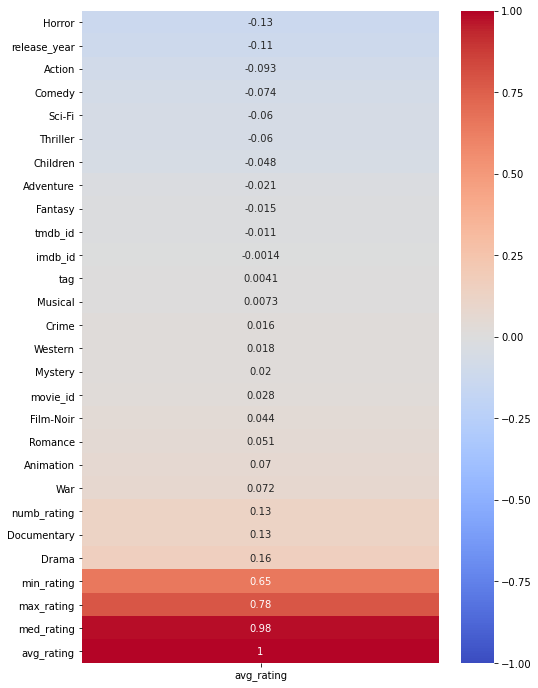

In [19]:
plt.figure(figsize = (8,12))
sns.heatmap(df.corr()[['avg_rating']].sort_values('avg_rating'),
                                                   annot = True,
                                                   cmap = 'coolwarm',
                                                   vmin = -1,
           vmax = 1)

<AxesSubplot:>

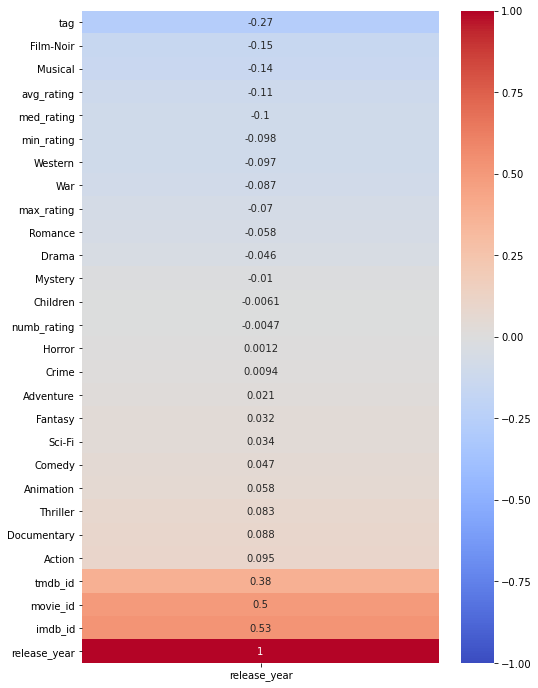

In [20]:
plt.figure(figsize = (8,12))
sns.heatmap(df.corr()[['release_year']].sort_values('release_year'),
                                                   annot = True,
                                                   cmap = 'coolwarm',
                                                   vmin = -1,
           vmax = 1)

<AxesSubplot:>

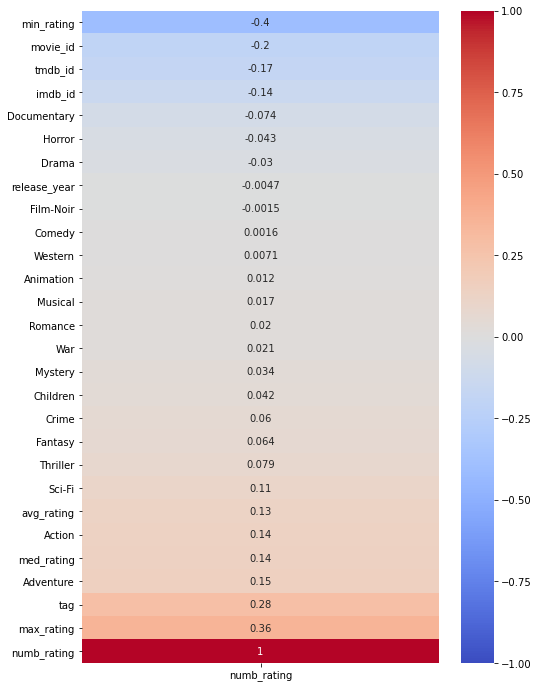

In [21]:
plt.figure(figsize = (8,12))
sns.heatmap(df.corr()[['numb_rating']].sort_values('numb_rating'),
                                                   annot = True,
                                                   cmap = 'coolwarm',
                                                   vmin = -1,
           vmax = 1)

<AxesSubplot:>

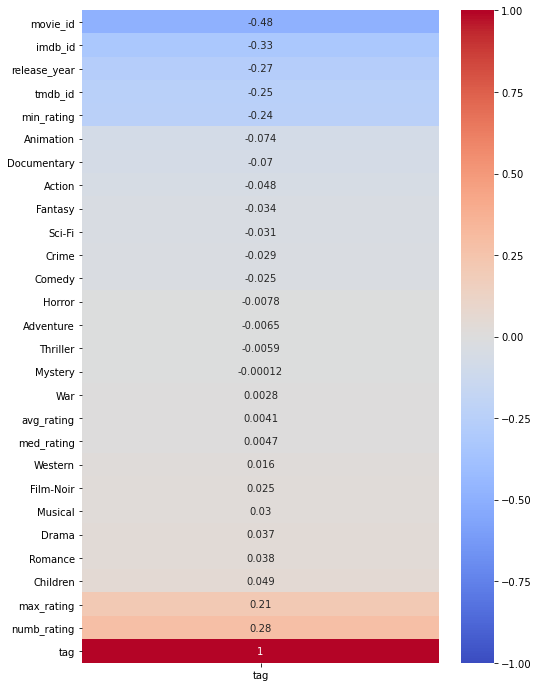

In [22]:
plt.figure(figsize = (8,12))
sns.heatmap(df.corr()[['tag']].sort_values('tag'),
                                                   annot = True,
                                                   cmap = 'coolwarm',
                                                   vmin = -1,
           vmax = 1)

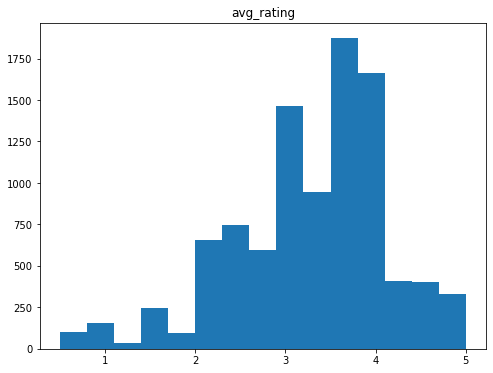

In [23]:
plt.figure(figsize = (8,6))
plt.hist(df['avg_rating'], bins=15);
plt.title('avg_rating');

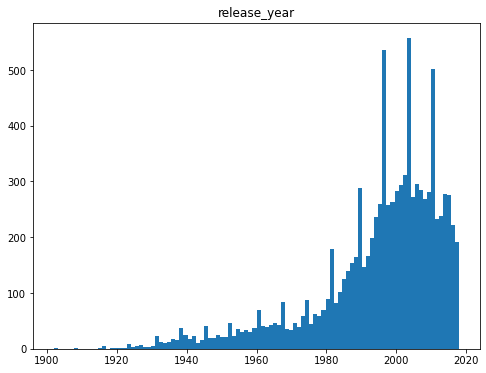

In [24]:
plt.figure(figsize = (8,6))
plt.hist(df['release_year'], bins=100);
plt.title('release_year');

In [26]:
genre_counts = []

for i in genres_list:
    count = df[i].sum()
    genre_counts.append(count)

genre_dist = pd.DataFrame(list(zip(genres_list, genre_counts)), columns = ['genre', 'count'])
genre_dist.sort_values(by = 'count', ascending = False, inplace=True)

Text(0.5, 1.0, 'Genre Distribution')

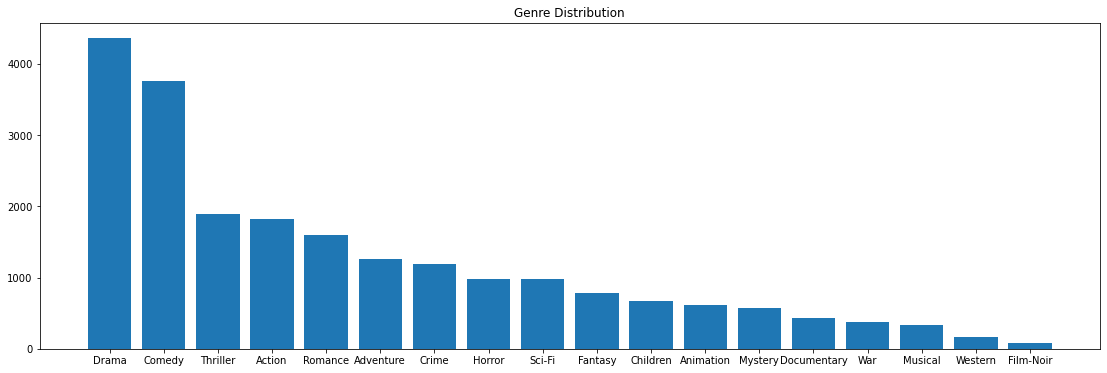

In [48]:
plt.figure(figsize = (19,6))
plt.bar(x = genre_dist['genre'], height = genre_dist['count'])
plt.title('Genre Distribution')

In [58]:
decades_dist = pd.DataFrame(df['decade'].value_counts())
decades_dist;

Text(0.5, 1.0, 'Release Decade Distribution')

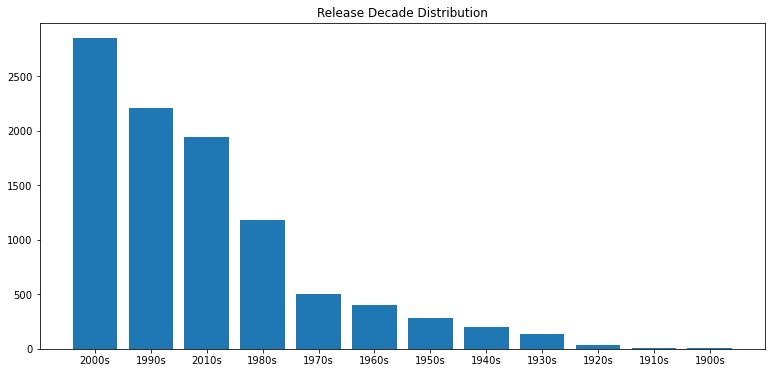

In [59]:
plt.figure(figsize = (13,6))
plt.bar(x = decades_dist.index, height = decades_dist['decade'])
plt.title('Release Decade Distribution')